# Perplexity Analysis
---

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-paper')
%matplotlib inline

In [2]:
results_dir = Path('../results/')
np.random.seed(42)

# Valid vs XNLI 

In [3]:
exp = 'finetune_bert'
datasets = ['valid', 'xnli']
log_name = f'run-{exp}-tag-Perplexity_{datasets[0]}.csv'
df = pd.read_csv(results_dir / exp / log_name)

In [4]:
dfs = []
for i in range(3):
    log_run = f'run{i+1}-{exp}-tag-Perplexity_{datasets[0]}.csv'
    dfs.append(pd.read_csv(results_dir / exp / log_run)['Value'])
df_valid = pd.DataFrame()
df_valid['Wall time'] = df['Wall time']
df_valid['Step'] = df['Step']
df_valid['Value_mean'] = pd.concat(dfs).groupby(level=0).mean()
df_valid['Value_std'] = pd.concat(dfs).groupby(level=0).std()

In [5]:
log_name = f'run-{exp}-tag-Perplexity_{datasets[1]}.csv'
df = pd.read_csv(results_dir / exp / log_name)

In [6]:
dfs = []
for i in range(3):
    log_run = f'run{i+1}-{exp}-tag-Perplexity_{datasets[1]}.csv'
    dfs.append(pd.read_csv(results_dir / exp / log_run)['Value'])
df_xnli = pd.DataFrame()
df_xnli['Wall time'] = df['Wall time']
df_xnli['Step'] = df['Step']
df_xnli['Value_mean'] = pd.concat(dfs).groupby(level=0).mean()
df_xnli['Value_std'] = pd.concat(dfs).groupby(level=0).std()

In [7]:
limit = 31
df_valid = df_valid[:limit].copy()
df_xnli = df_xnli[:limit].copy()

## Plot

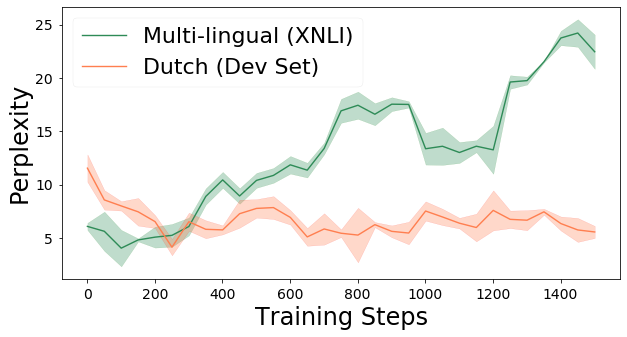

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_xnli['Step'], df_xnli['Value_mean'], color='seagreen', label='Multi-lingual (XNLI)')
ax.fill_between(df_xnli['Step'], df_xnli['Value_mean']-df_xnli['Value_std'], df_xnli['Value_mean']+df_xnli['Value_std'],
                alpha=0.3, edgecolor='green', facecolor='seagreen', antialiased=True)

ax.plot(df_valid['Step'], df_valid['Value_mean'], color='coral', label='Dutch (Dev Set)')
ax.fill_between(df_valid['Step'], df_valid['Value_mean']-df_valid['Value_std'], df_valid['Value_mean']+df_valid['Value_std'],
                alpha=0.3, edgecolor='red', facecolor='coral', antialiased=True)
ax.set_xlabel('Training Steps', fontsize=24)
ax.set_ylabel('Perplexity', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
#plt.grid(color='w', linestyle='solid')
ax.legend(fontsize=22)
plt.show()